In [27]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

### Q1: Write down the meta information about the “wine.csv” data file available in the UCI repository, https://archive.ics.uci.edu/ml/datasets/Wine.

#### Wine Data Set
- 0 missing vals
- 13 real number attributes
    1. Alcohol
    2. Malic acid
    3. Ash
    4. Alcalinity of ash
    5. Magnesium
    6. Total phenols
    7. Flavanoids
    8. Nonflavanoid phenols
    9. Proanthocyanins
    10. Color intensity
    11. Hue
    12. OD280/OD315 of diluted wines
    13. Proline
- Classification task, classify within 3 classes: 1, 2, 3.



In [28]:
df = pd.read_csv('wine.csv')
df.head().T

,0,1,2,3,4
Class,1.00,1.00,1.00,1.00,1.00
Alcohol,14.23,13.20,13.16,14.37,13.24
Malic acid,1.71,1.78,2.36,1.95,2.59
Ash,2.43,2.14,2.67,2.50,2.87
Alcalinity of ash,15.60,11.20,18.60,16.80,21.00
Magnesium,127.00,100.00,101.00,113.00,118.00
Total phenols,2.80,2.65,2.80,3.85,2.80
Flavanoids,3.06,2.76,3.24,3.49,2.69
Nonflavanoid phenols,0.28,0.26,0.30,0.24,0.39
Proanthocyanins,2.29,1.28,2.81,2.18,1.82


### Q2: Tabulate and visualize the distribution of the numeric variables.

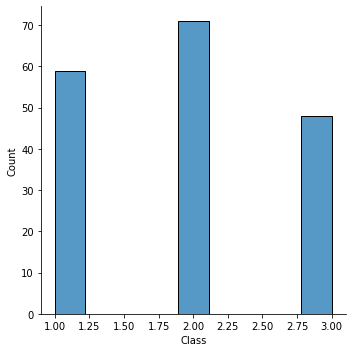

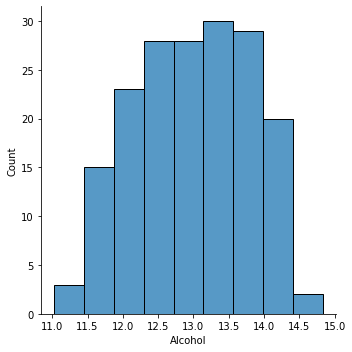

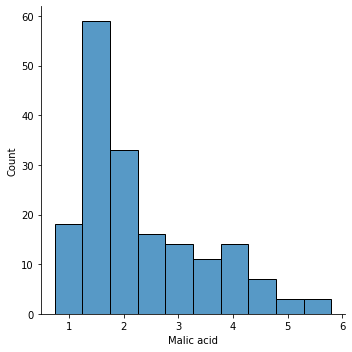

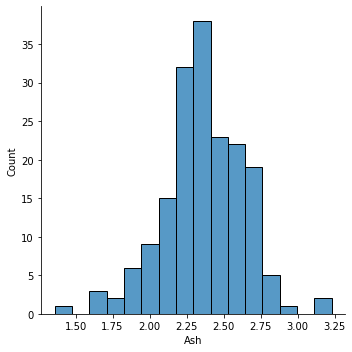

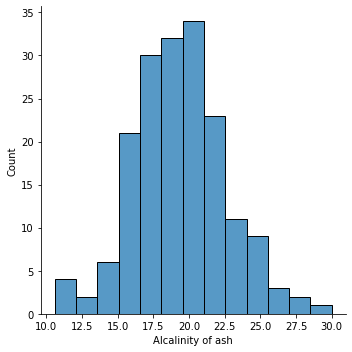

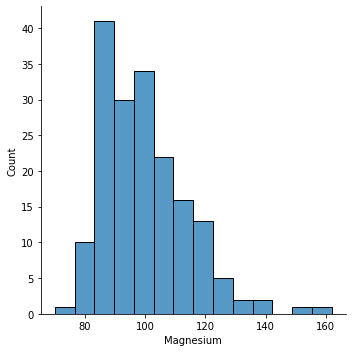

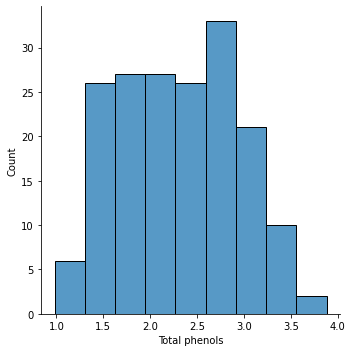

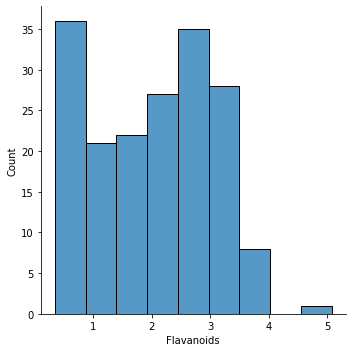

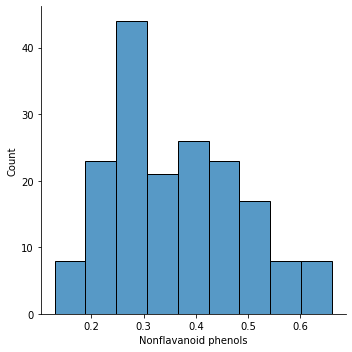

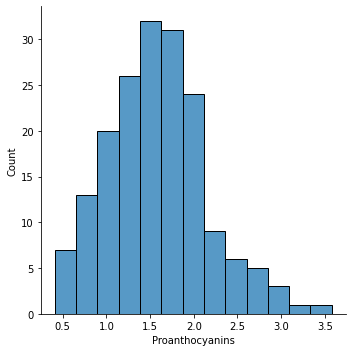

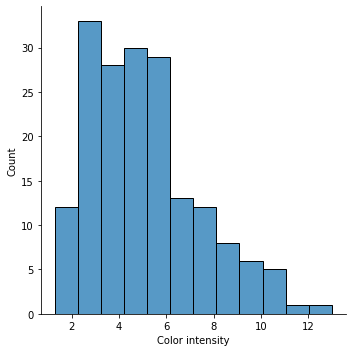

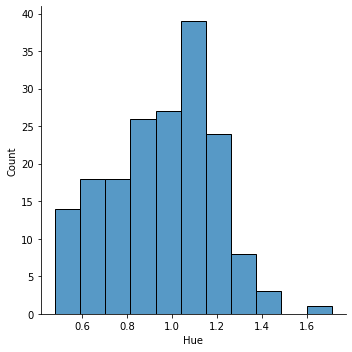

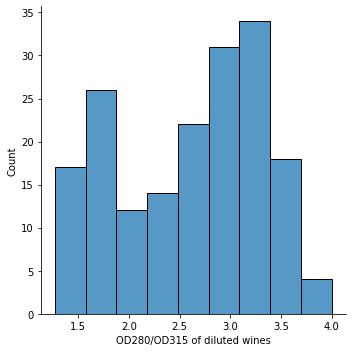

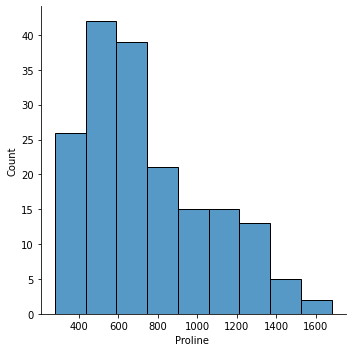

In [29]:
for col in list(df):
    sns.displot(df, x=str(col))

In [30]:
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [31]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Q3: Perform  the  required  preprocessing  ,  70,30  split  and  build  a  classifier  using the Multi-Layer  Perceptron  Classifier  modelavailable  in  SciKit  Learn. Use 3  layers with  the  same  number  of  neurons  as  there  are  features  along  with  500  max iterations.

In [32]:
X, y = df.drop(['Class'], axis=1).to_numpy(), df['Class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(np.asarray(X_train))
X_test = scaler.transform(np.asarray(X_test))

In [34]:
classifier = MLPClassifier(hidden_layer_sizes=(13,13,13),
                           max_iter=500,
                           activation = 'relu',
                           solver='adam', 
                           random_state=1)

In [35]:
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500, random_state=1)

In [36]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

In [37]:
f1_train = f1_score(y_train_pred, y_train, average=None)

In [38]:
f1_pred = f1_score(y_test_pred, y_test, average=None)

In [39]:
precision_train = precision_score(y_train_pred, y_train, average=None)

In [40]:
precision_pred = precision_score(y_test_pred, y_test, average=None)

In [41]:
recall_score(y_train_pred, y_train, average=None)

array([1., 1., 1.])

In [42]:
recall_score(y_test_pred, y_test, average=None)

array([0.93333333, 0.94736842, 1.        ])

In [43]:
acc_train = accuracy_score(y_train_pred, y_train)

In [44]:
acc_test = accuracy_score(y_test_pred, y_test)

### Q4: Tabulate the precision, recall and F1-score

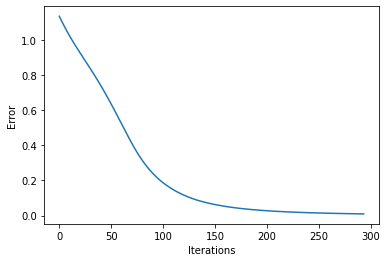

In [45]:
plt.plot(classifier.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel('Error')
plt.show()

In [46]:
df2 = pd.DataFrame([f1_pred,precision_pred])
df2 = df2.T
df2.columns =['F1','Recall']
df2

,F1,Recall
0,0.965517,1.000000
1,0.947368,0.947368
2,0.975610,0.952381


In [47]:
print(acc_test)

0.9629629629629629


### Q5: Display the MLP weights and biases after training your model.

In [48]:
classifier.intercepts_

[array([ 0.21097402,  0.00138231,  0.36168373,  0.20576889,  0.10716115,
         0.20328226,  0.31306833,  0.32391299, -0.09878013, -0.29598381,
         0.05446027,  0.31115402, -0.27028202]),
 array([ 0.33408021, -0.27980584, -0.15161292,  0.21091367, -0.06223864,
         0.36350123,  0.10736486,  0.23166178,  0.65358735, -0.03503613,
        -0.37831175,  0.39419249,  0.19947234]),
 array([ 0.21370079,  0.43731735,  0.29801412,  0.11543197,  0.13847764,
        -0.46776346, -0.01818712, -0.00761717,  0.19024616,  0.04348301,
         0.05457449, -0.27888065, -0.29851509]),
 array([-0.02515934,  0.39730606, -0.27985186])]

In [49]:
classifier.coefs_

[array([[-0.07767099,  0.34198107, -0.43842637, -0.29889419, -0.54850346,
         -0.54113281, -0.24503108,  0.03320142,  0.02155179, -0.08745852,
         -0.01840074,  0.34087746, -0.35737682],
        [ 0.34507726, -0.62111743,  0.22013172,  0.090783  , -0.00236817,
         -0.54833903, -0.29763238,  0.50344916,  0.35688383, -0.3324045 ,
          0.29147314,  0.2107172 ,  0.33718873],
        [-0.35549382, -0.4047068 , -0.2711495 ,  0.42686235, -0.44549869,
         -0.25355087,  0.51001607,  0.21122263,  0.2552473 , -0.30342943,
          0.17043566,  0.3841893 , -0.49663421],
        [ 0.35302675,  0.31468054,  0.2346708 , -0.07673523,  0.5176934 ,
         -0.34590145, -0.15985014,  0.34800052, -0.34512218, -0.07082178,
         -0.19849096, -0.67151891,  0.20616196],
        [-0.40837324, -0.0681331 ,  0.03272463, -0.5213536 , -0.07384183,
         -0.4140181 ,  0.16152173,  0.28455421, -0.28287962, -0.19896149,
          0.14158437,  0.02112374, -0.46261443],
        [-0.131